# EDA Bluesky Stats & News
Análisis exploratorio de los datos obtenidos de estadísticas y número de usuarios en Bluesky junto a las noticias más relevantes en política, internacional, deportes y más.

## Sobre el Dataset
- 701 registros
- 23 columnas:
  - **date**: fecha en formato Y-m-d, va desde 2023-05-08 hasta 2025-04-07
  - Datos exógenos:
    - **artificial intelligence**: las noticias más noticias relevantes ocurridas en el ámbito de la IA en los años 2023, 2024 y 2025
    - **elections**: todas las elecciones que se celebraron en el mundo durante los años 2023, 2024 y 2025
    - **politics**: las noticias más noticias relevantes ocurridas en el ámbito de la política mundial en los años 2023, 2024 y 2025
    - **science**: las noticias más noticias relevantes ocurridas en el ámbito de la ciencia en los años 2023, 2024 y 2025
    - **sports**: los eventos deportivos más relevantes celebrados en el mundo en los años 2023, 2024 y 2025
    - **videogames**: las noticias más noticias relevantes ocurridas en el ámbito de los videojuegos en los años 2023, 2024 y 2025
    - **others**: 'crime', 'education', 'entertainment', 'environment', 'finance', 'health', 'immigration', 'international relations', 'pandemics', 'protests', 'technology', 'war'
  - Datos endógenos (relacionados con Bluesky)
    - **bluesky**: noticias publicadas en el blog de Bluesky durante los años 2023, 2024 y 2025
    - **users**: total agregado de usuarios por día
    - **new_users**: número de nuevos usuarios por día
    - **num_likes**: cantidad de likes que se registran en total en la plataforma ese día
    - **num_posts**: cantidad de posts que se han publicado en total ese día en la plataforma
    - **num_images**: cantidad de imágenes que se han publicado en total ese día en la plataforma
    - **num_follows**: cantidad de follows que se han hecho en total ese día en la plataforma
    - **num_blocks**: cantidad de bloqueos que se han hecho en total ese día en la plataforma


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from forecasting_bluesky_code import eda_plots as ep
from forecasting_bluesky_code import preprocessing as pre


In [3]:
# Definición de paleta para los plots
sns.set_theme()
sns.set_palette('husl')

In [4]:
df = pd.read_csv('final_dataset_bsky_news.csv')

In [5]:
df = pre.basic_proc_final_dataset(df)

In [6]:
df.columns

Index(['artificial intelligence', 'crime', 'education', 'elections',
       'entertainment', 'environment', 'finance', 'health', 'immigration',
       'international relations', 'pandemics', 'politics', 'protests',
       'science', 'sports', 'technology', 'videogames', 'war', 'tot_users',
       'new_users', 'num_likes', 'num_posts', 'num_images', 'num_follows',
       'num_blocks'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 701 entries, 2023-05-08 to 2025-04-07
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   artificial intelligence  701 non-null    object 
 1   crime                    701 non-null    object 
 2   education                701 non-null    object 
 3   elections                701 non-null    object 
 4   entertainment            701 non-null    object 
 5   environment              701 non-null    object 
 6   finance                  701 non-null    object 
 7   health                   701 non-null    object 
 8   immigration              701 non-null    object 
 9   international relations  701 non-null    object 
 10  pandemics                701 non-null    object 
 11  politics                 701 non-null    object 
 12  protests                 701 non-null    object 
 13  science                  701 non-null    object 
 14  sports 

## Análisis de la temporalidad
Nos encontrampos ante una **serie temporal multivariante**, es decir, que tiene más de una sola variable dependiente del tiempo.

Para la variable *users* tenemos:
- **Tendencia al alza**, siendo mucho más pronunciada a partir de noviembre de 2024.
- **Sin estacionalidad**, no se detectan fluctuaciones periódicas o que respondan a periodos de tiempo concretos. 

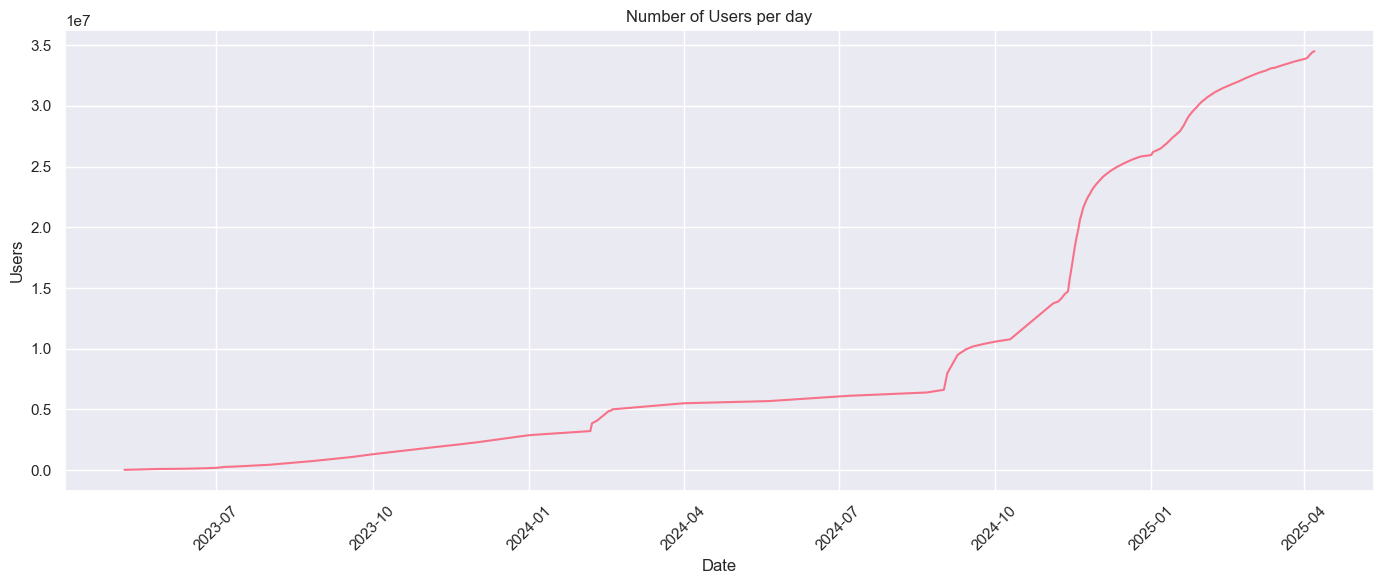

In [14]:
ep.var_per_day(df['tot_users'],'Users')

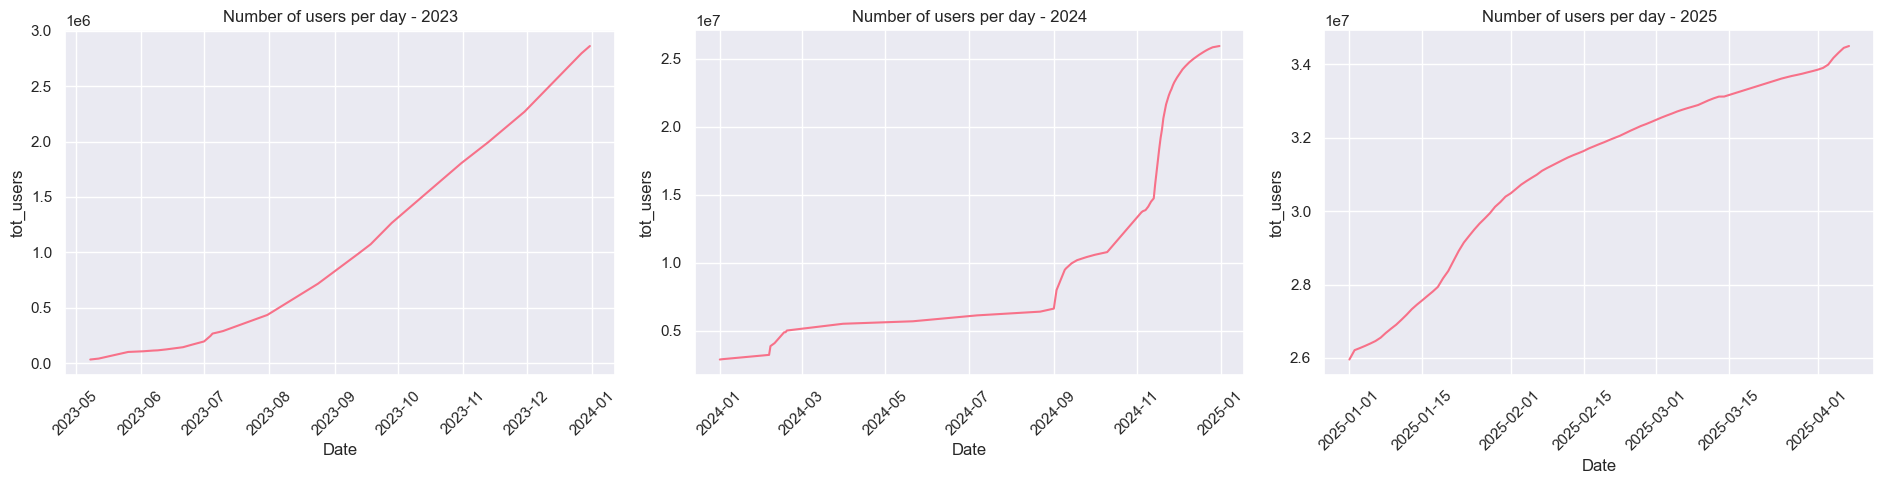

In [16]:
df['date'] = pd.to_datetime(df.index)
ep.var_per_day_per_year(df,'tot_users')

Para la variable *new_users* no hay un crecimiento continuo ni una estacionalidad clara, analizamos por año:
- **En 2023** vemos una tendencia al alza con un crecimiento suave.
- **En 2024** comienzan a aparecer picos de crecimiento muy pronunciados, seguidos por descensos igual de abruptos. Estos picos no son estacionales ni suaves.
- **En 2025** este comportamiento de intensifica, aunque la tendencia se inclina a la baja.

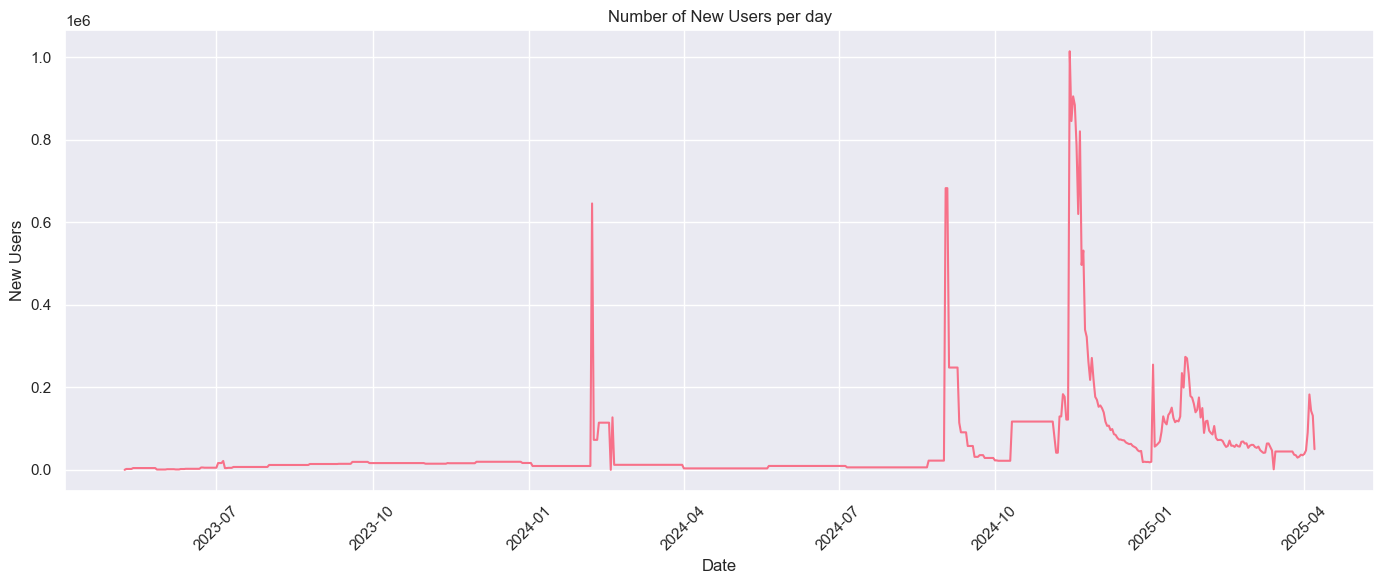

In [19]:
ep.var_per_day(df['new_users'],'New Users')

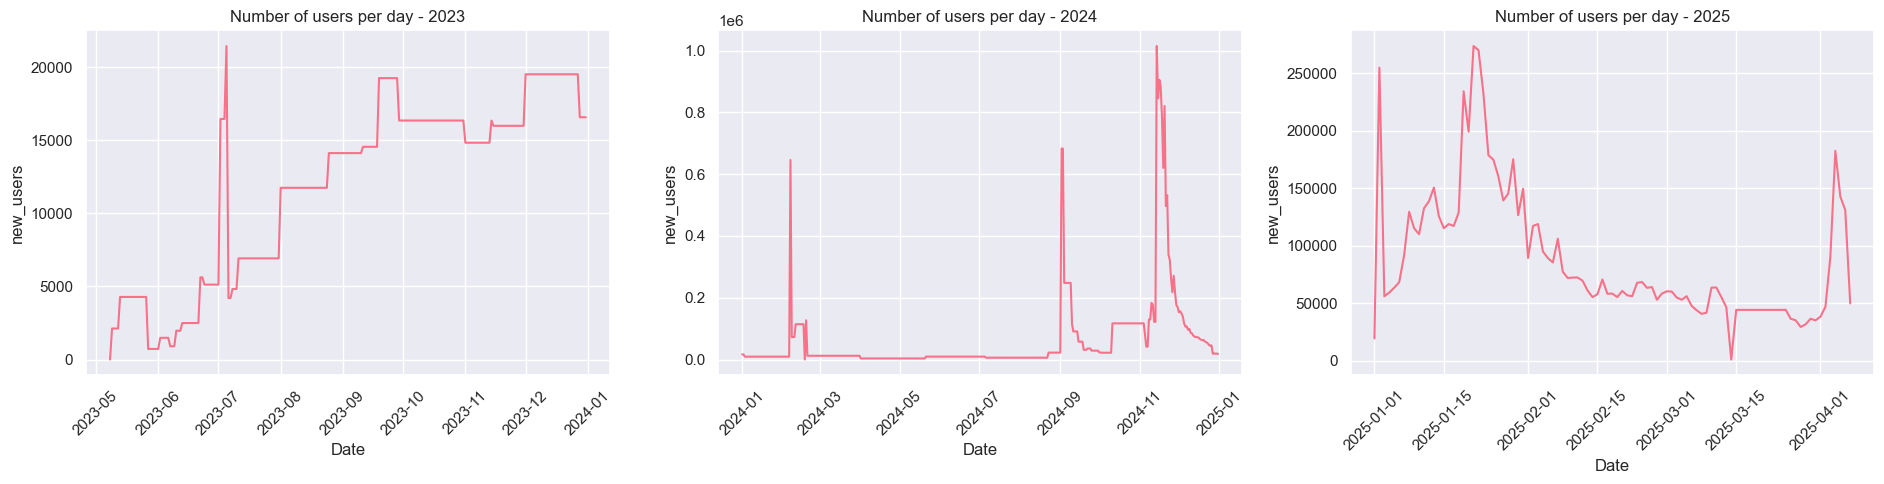

In [21]:
ep.var_per_day_per_year(df,'new_users', save = True, filename= 'new_users_per_day_per_year')

Recogemos todas las variables de actividad para analizarlas ('num_likes', 'num_posts', 'num_images', 'num_follows', 'num_blocks'):
- Todas las variables de actividad presentan tendencias muy similares entre sí, lo que nos indica que están muy correlacionadas.
- **En 2023** vemos una suave tendencia al alza aunque a final de año (a partir del mes de octubre) se revierte hacia la baja.
- **En 2024** tenemos una tendencia muy suave y estacionaria hasta el mes de septiembre donde comienzan una serie de picos de crecimiento y decrecimiento muy abruptos, igual que ocurría con los nuevos usuarios.
- **En 2025** la tendencia, aunque también repleta de picos de actividad, se marca más hacia la baja. 

In [23]:
activity_vars = ['num_likes', 'num_posts', 'num_images', 'num_follows', 'num_blocks']

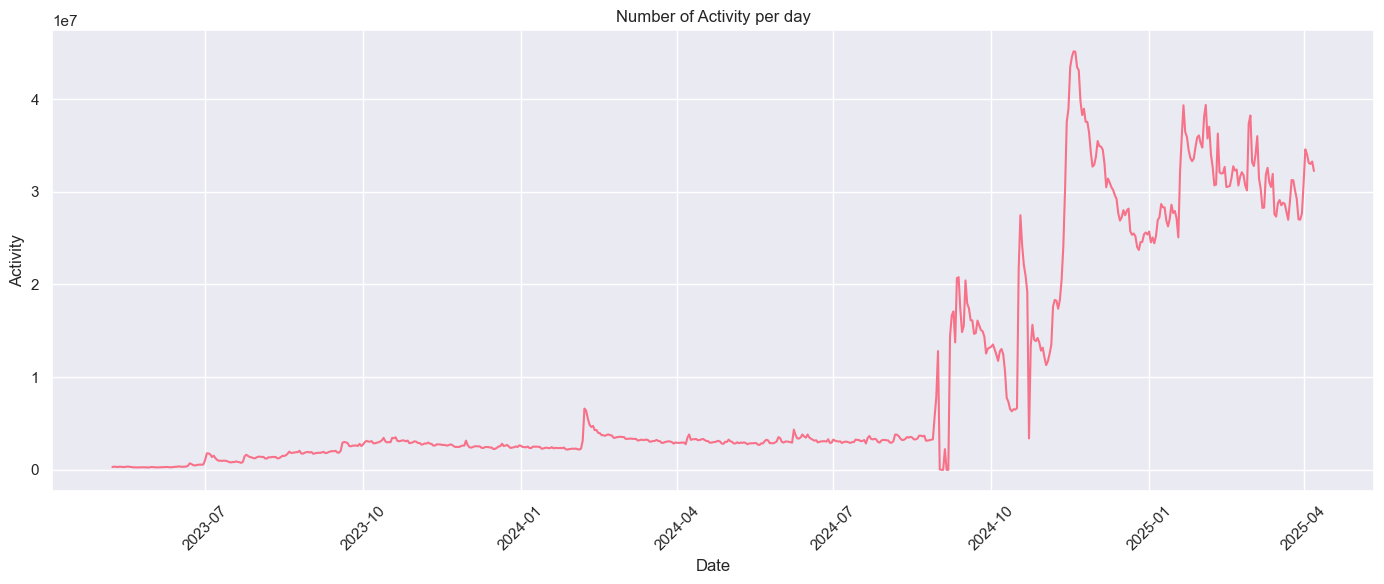

In [24]:
ep.var_per_day(df['num_likes'],'Activity', save=True, filename='activity_per_day')

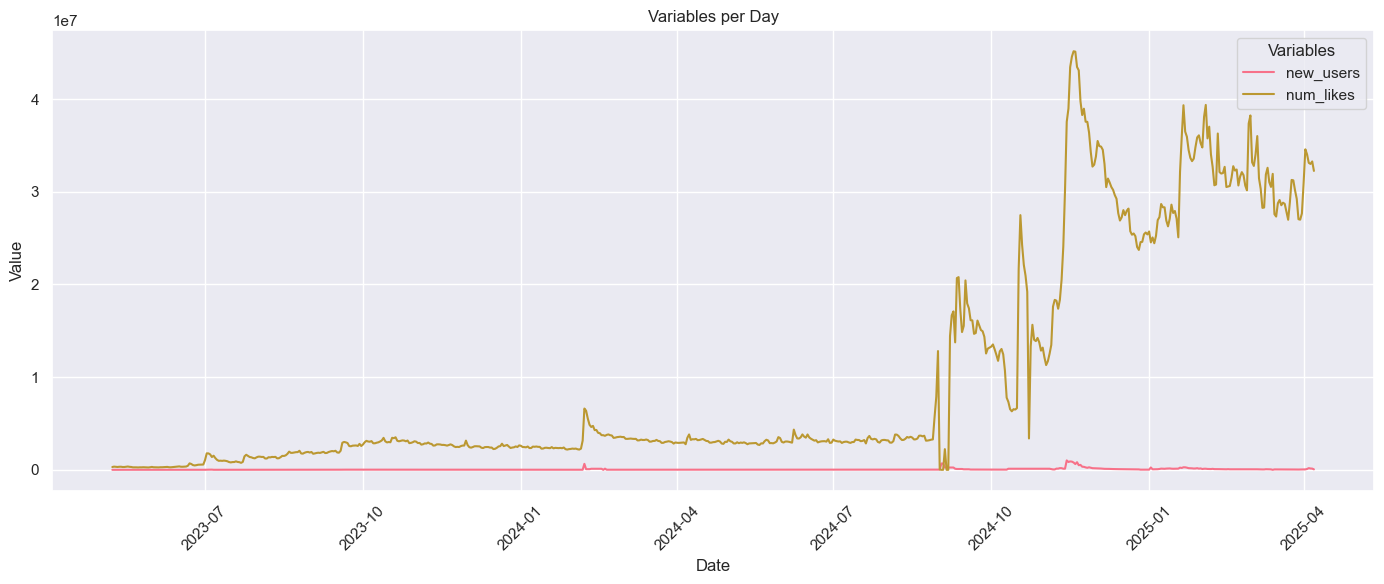

In [32]:
ep.vars_per_day_multivar(df, ['new_users','num_likes'])

num_likes ------------------------------------------------------------------------------------------------------------------------------------------------------


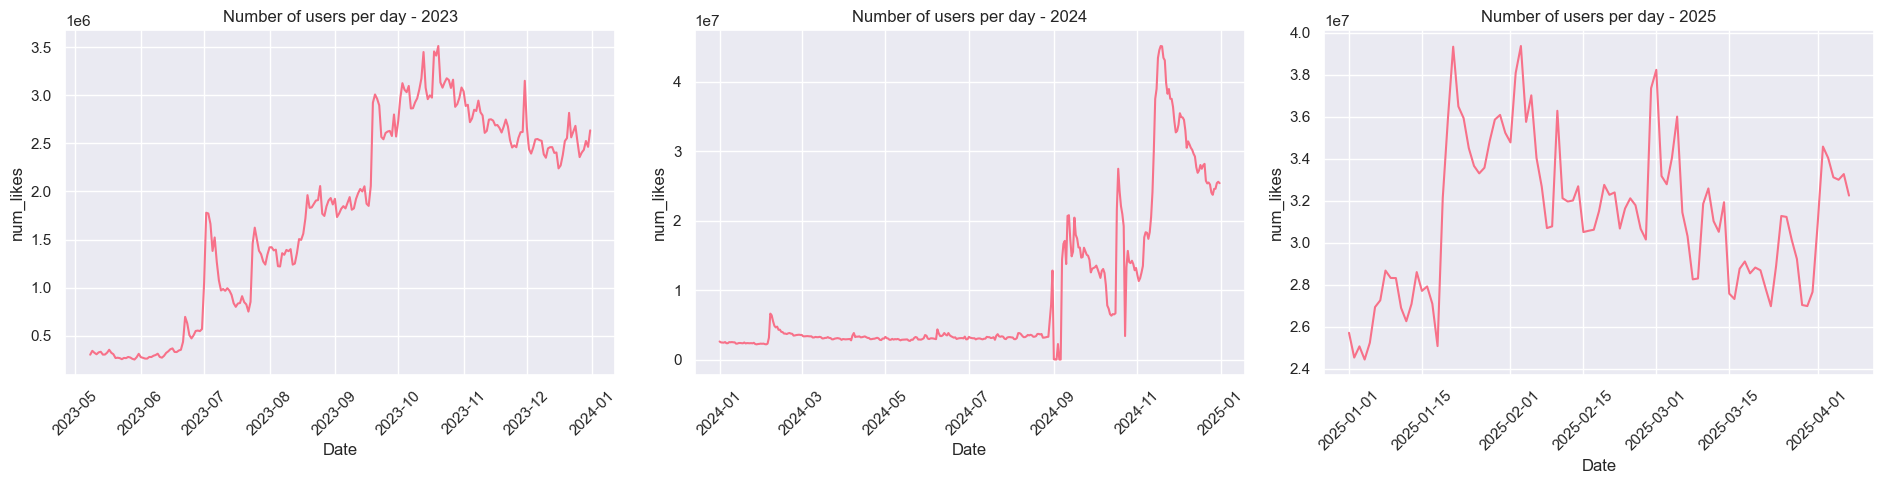

num_posts ------------------------------------------------------------------------------------------------------------------------------------------------------


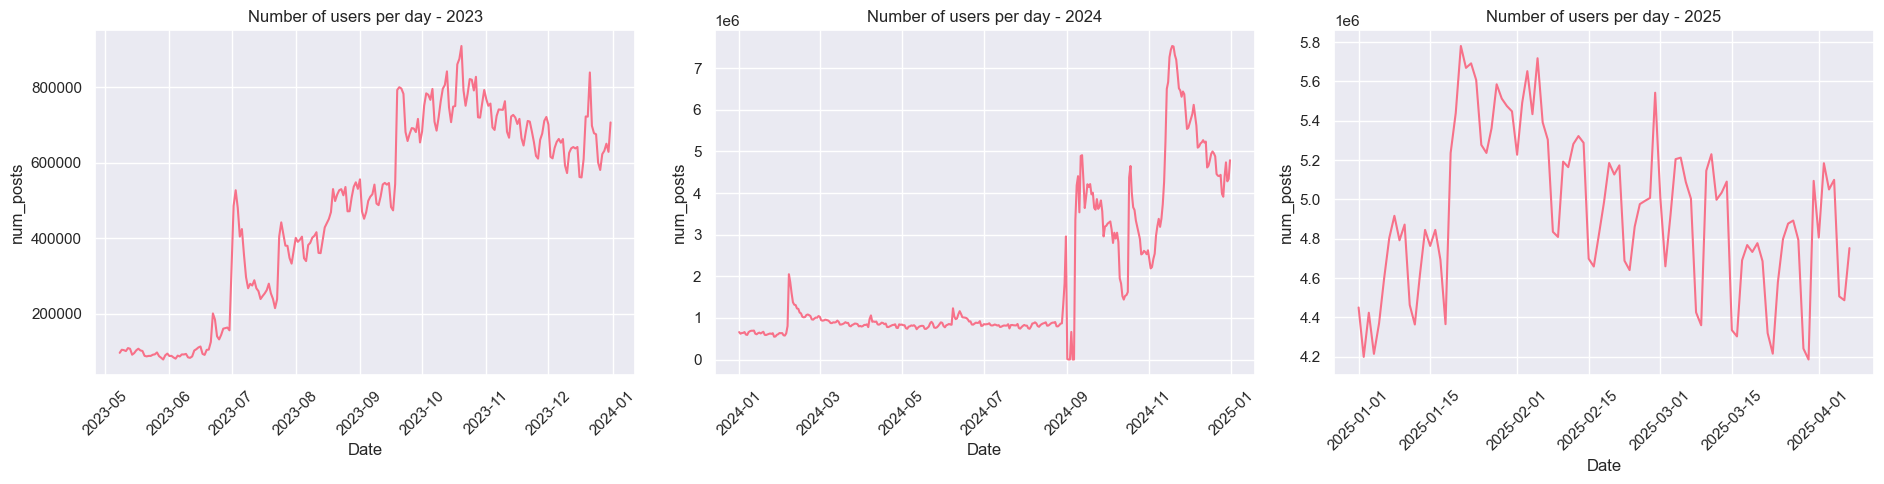

num_images ------------------------------------------------------------------------------------------------------------------------------------------------------


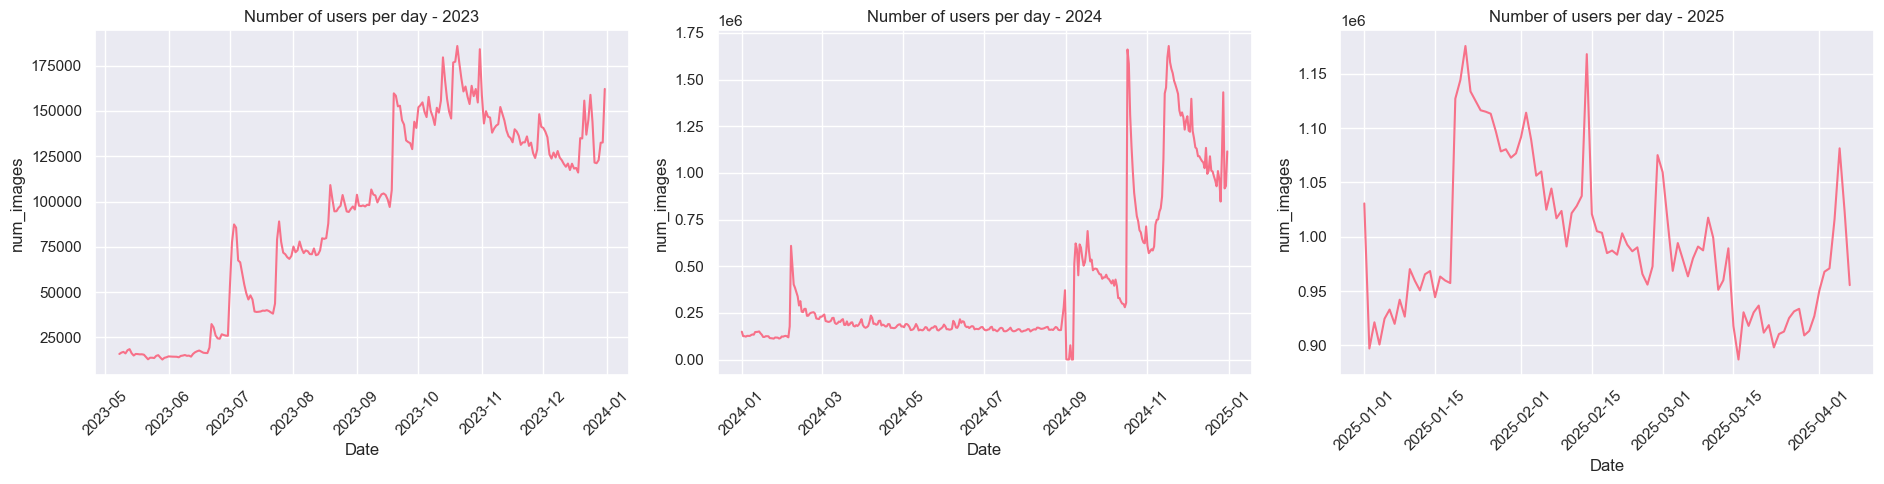

num_follows ------------------------------------------------------------------------------------------------------------------------------------------------------


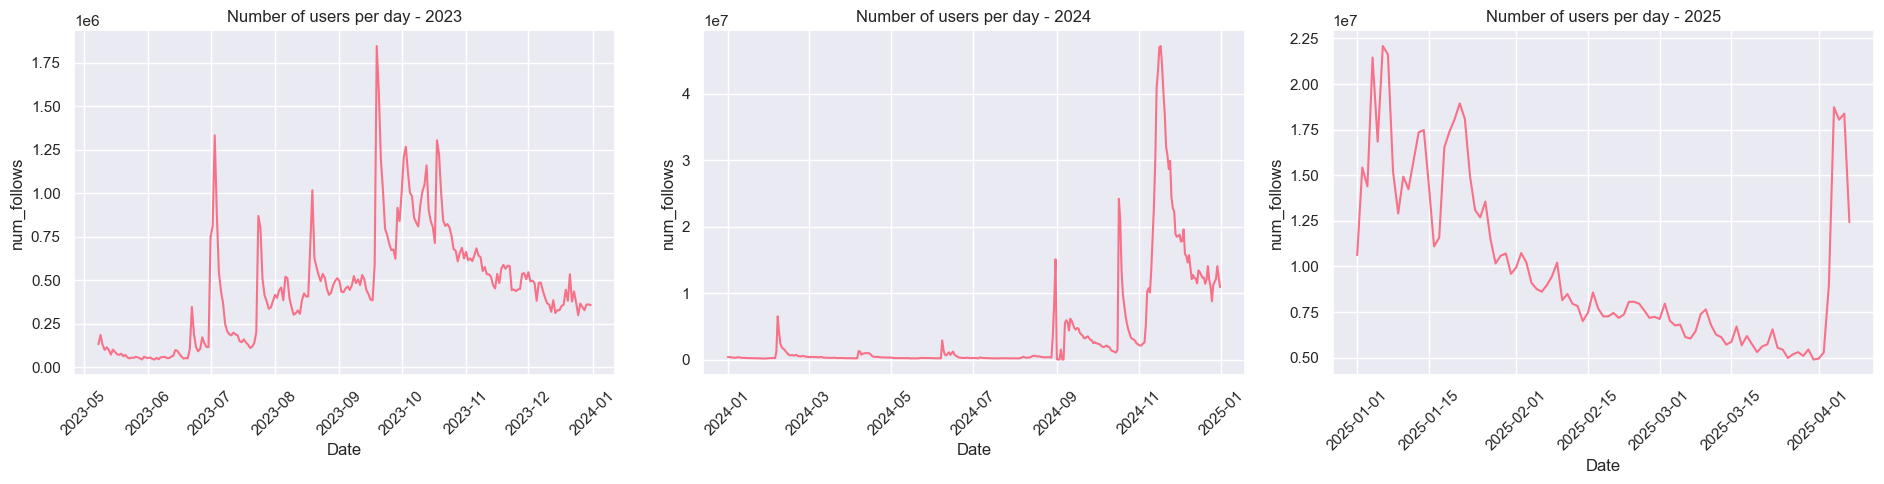

num_blocks ------------------------------------------------------------------------------------------------------------------------------------------------------


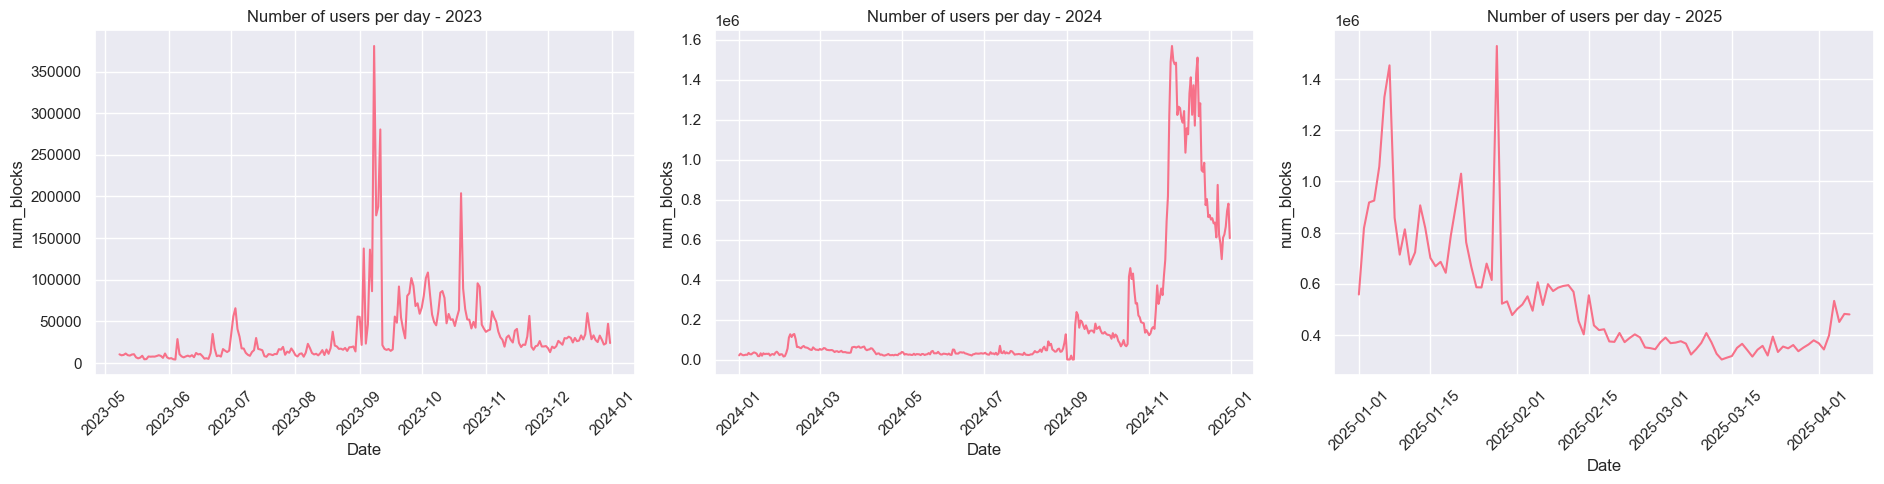

In [28]:
for var in activity_vars:
    print(var, '-'*150)
    ep.var_per_day_per_year(df,var)

In [30]:
# Análisis descriptivo de la actividad en 2023
df[df['date'].dt.year == 2023].describe()

,tot_users,new_users,num_likes,num_posts,num_images,num_follows,num_blocks,date
count,2.380000e+02,238.000000,2.380000e+02,238.000000,238.000000,2.380000e+02,238.000000,238
mean,1.077501e+06,11901.189076,1.786333e+06,474088.130252,92621.672269,4.537897e+05,34120.478992,2023-09-03 12:00:00
min,3.152200e+04,0.000000,2.535530e+05,78430.000000,12728.000000,4.506300e+04,4298.000000,2023-05-08 00:00:00
25%,2.712062e+05,5946.619048,8.430120e+05,253681.000000,39336.250000,1.838998e+05,11078.500000,2023-07-06 06:00:00
50%,8.646208e+05,14126.647059,1.876822e+06,521917.500000,98675.000000,4.388090e+05,20114.500000,2023-09-03 12:00:00
75%,1.831328e+06,16358.454545,2.633419e+06,689958.000000,139125.750000,6.044222e+05,41588.500000,2023-11-01 18:00:00
max,2.864005e+06,21458.000000,3.511191e+06,909738.000000,185885.000000,1.847393e+06,380614.000000,2023-12-31 00:00:00
std,8.792158e+05,6116.698188,1.000761e+06,249172.121667,52616.163733,3.174909e+05,41440.684854,NaN


In [32]:
for year in df.date.dt.year.unique():

    min_us = df[df['date'].dt.year == year]['tot_users'].min()
    max_us = df[df['date'].dt.year == year]['tot_users'].max()
    mean_us = df[df['date'].dt.year == year]['new_users'].mean().round(2)

    print('-'*70)
    print(f'DATOS RELEVANTES DE USUARIOS {year}')
    print('-'*70)
    print(f'{year} comienza con: {min_us / 1000} K usuarios')
    print(f'{year} termina con: {max_us / 1000} K usuarios')
    print(f'Media de nuevos usuarios diarios en {year}: {mean_us / 1000} K')
    print(f'Crecimiento total de usuarios en {year}: {(max_us - min_us) / 1000} K')
    print(f'Tasa de crecimiento en {year}: {ep.tasa_crecimiento(min_us, max_us)} %')

----------------------------------------------------------------------
DATOS RELEVANTES DE USUARIOS 2023
----------------------------------------------------------------------
2023 comienza con: 31.522 K usuarios
2023 termina con: 2864.005 K usuarios
Media de nuevos usuarios diarios en 2023: 11.90119 K
Crecimiento total de usuarios en 2023: 2832.483 K
Tasa de crecimiento en 2023: 8985.73 %
----------------------------------------------------------------------
DATOS RELEVANTES DE USUARIOS 2024
----------------------------------------------------------------------
2024 comienza con: 2880.5865 K usuarios
2024 termina con: 25935.249 K usuarios
Media de nuevos usuarios diarios en 2024: 63.036190000000005 K
Crecimiento total de usuarios en 2024: 23054.6625 K
Tasa de crecimiento en 2024: 800.35 %
----------------------------------------------------------------------
DATOS RELEVANTES DE USUARIOS 2025
----------------------------------------------------------------------
2025 comienza con: 2595

In [34]:
for year in df.date.dt.year.unique():

    min_act = df[df['date'].dt.year == year]['num_likes'].min()
    max_act = df[df['date'].dt.year == year]['num_likes'].max()
    mean_act = df[df['date'].dt.year == year]['num_likes'].mean().round(2)

    print('-'*70)
    print(f'DATOS RELEVANTES DE ACTIVIDAD {year}')
    print('-'*70)
    print(f'{year} tiene un mínimo de actividad diaria de: {min_act / 1000} K de likes al día')
    print(f'{year} tiene un máximo de actividad diaria de: {max_act / 1000} K de likes al día')
    print(f'Media de likes diarios en {year}: {mean_act / 1000} K')
    print(f'Diferencia de likes del día de mayor actividad al que menos en {year}: {(max_act - min_act) / 1000} K')
    print(f'Diferencia de likes en porcentaje {year}: {ep.tasa_crecimiento(min_act, max_act)} %')

----------------------------------------------------------------------
DATOS RELEVANTES DE ACTIVIDAD 2023
----------------------------------------------------------------------
2023 tiene un mínimo de actividad diaria de: 253.553 K de likes al día
2023 tiene un máximo de actividad diaria de: 3511.191 K de likes al día
Media de likes diarios en 2023: 1786.33328 K
Diferencia de likes del día de mayor actividad al que menos en 2023: 3257.638 K
Diferencia de likes en porcentaje 2023: 1284.8 %
----------------------------------------------------------------------
DATOS RELEVANTES DE ACTIVIDAD 2024
----------------------------------------------------------------------
2024 tiene un mínimo de actividad diaria de: 0.27 K de likes al día
2024 tiene un máximo de actividad diaria de: 45156.991 K de likes al día
Media de likes diarios en 2024: 9189.667720000001 K
Diferencia de likes del día de mayor actividad al que menos en 2024: 45156.721 K
Diferencia de likes en porcentaje 2024: 16724711.48 %
-

## Matriz de correlación
Estudiamos la correlación de las variables de noticias con nuestra variable objetivo: new_users

In [36]:
# 1. Seleccionar las columnas categóricas (aquellas que tienen dtype 'object')
cat_cols = df.select_dtypes(include=['object']).columns

# 2. Crear un nuevo DataFrame con las columnas categóricas codificadas
df_encoded = df.copy()

# 3. Para cada columna categórica, codificamos:
for col in cat_cols:
    df_encoded[col] = df_encoded[col].apply(lambda x: 1 if x != '' else 0)

# 4. Eliminar la columna 'date' si no es numérica
df_encoded = df_encoded.drop(columns=['date','num_follows','num_blocks','num_images','num_posts','num_likes','tot_users'])

# 5. Calcular la matriz de correlación entre las variables numéricas y las nuevas variables codificadas
correlation_matrix = df_encoded.corr()


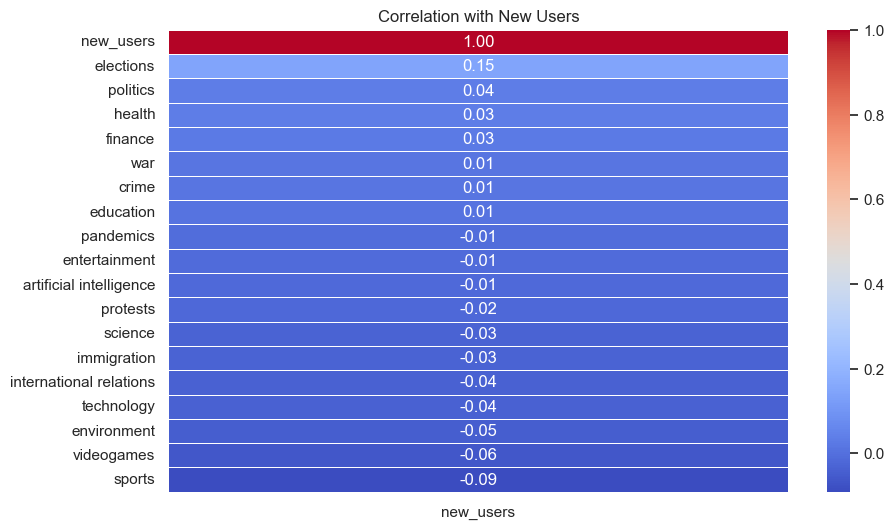

In [40]:
# Resaltamos la correlación con 'new_users' que será nuestra variable objetivo
new_users_corr = correlation_matrix['new_users'].sort_values(ascending=False)

# Visualizamos la correlación de 'new_users' con las demás variables usando un heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(new_users_corr.to_frame(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation with New Users')
plt.savefig('correlation-matrix.png')
plt.show()